# Microsaccade analysis using PyTrack

PyTrack https://github.com/titoghose/PyTrack

**Note/To-do**
Cut data length/trial to minimum condition length

In [37]:
%matplotlib inline
# %matplotlib qt

import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
# matplotlib.use('Qt5Agg')

from mpl_toolkits.axes_grid1 import (make_axes_locatable, ImageGrid,
                                     inset_locator)

In [38]:
mpl.rc('font',family='Arial')
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12

In [39]:
import os
import json
import pickle
import math
import numpy as np
import pandas as pd
import seaborn as sns

In [40]:
from PyTrack.Stimulus import Stimulus
from PyTrack.formatBridge import generateCompatibleFormat

In [41]:
cond = ["Natural", "Dichotic", "SpeedUp", "SpeedDown"]

In [42]:
n_cond = 4
name_cond = cond[n_cond-1]
print(name_cond)

SpeedDown


In [43]:
list_sub_num = [14, 15, 21, 22, 23, 24, 36, 37, 38]
list_sub_num_op = ['a01', 'a02', 'a03', 'a04', 'a05', 'a06', 'a08', 'a09', 'a10']
list_group_num = [2, 1, 1, 2, 1, 2, 2, 1, 2]

In [44]:
sub_idx = list_sub_num.index(38)
print(sub_idx)

8


In [45]:
n_sub = list_sub_num[sub_idx]
n_sub_op = list_sub_num_op[sub_idx]
n_group = list_group_num[sub_idx]

if n_group == 1:
    name_group = 'AttnLeft'
elif n_group == 2:
    name_group = 'AttnRight'

print(n_sub)
print(n_sub_op)
print(n_group)
print(name_group)

38
a10
2
AttnRight


In [46]:
dir1 = r'C:\Users\parkh\Documents\Eyetracking_analysis\PyTrack-master_HP'
dir2 = 'Analysis'
dir3 = 'Data'

In [47]:
fname_dat = n_sub_op + 'cond' + str(n_cond)
print(fname_dat)

a10cond4


### Read asc file

In [48]:
fname_asc = os.path.join(dir1, dir2, dir3, fname_dat + '.asc')
print(fname_asc)

C:\Users\parkh\Documents\Eyetracking_analysis\PyTrack-master_HP\Analysis\Data\a10cond4.asc


In [49]:
# if not os.path.isfile(os.path.abspath("PyTrack_Sample_Data/EyeLink/sub_222.csv")):
generateCompatibleFormat(exp_path=os.path.abspath(fname_asc),
                        device="eyelink",
                        stim_list_mode="NA",
                        start="START", # case-sensitive: check .asc
                        stop="END", # case-sensitive: check .asc
                        eye="B")

Converting to base csv format:  a10cond4.asc
Converting file to Pandas CSV:  a10cond4.asc


C:\Users\parkh\Documents\Eyetracking_analysis\PyTrack-master_HP\PyTrack\formatBridge.py:126: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_dict(temp_dict, orient='index').transpose(), ignore_index=True, sort=False)


Progress: 100.00


In [50]:
fname_csv = os.path.join(dir1, dir2, dir3, fname_dat + '.csv')
print(fname_csv)

C:\Users\parkh\Documents\Eyetracking_analysis\PyTrack-master_HP\Analysis\Data\a10cond4.csv


In [51]:
# Read the csv file as a pandas dataframe
df = pd.read_csv(fname_csv)

In [52]:
df

,Unnamed: 0,Timestamp,StimulusName,EventSource,GazeLeftx,GazeRightx,GazeLefty,GazeRighty,PupilLeft,PupilRight,FixationSeq,SaccadeSeq,Blink,GazeAOI
0,0,2723123,stimulus_0,ET,997.2,971.9,567.3,576.8,4587.0,4587.0,-1.0,-1.0,-1.0,-1.0
1,1,2723125,stimulus_0,ET,996.8,972.0,567.2,577.5,4591.0,4587.0,-1.0,-1.0,-1.0,-1.0
2,2,2723127,stimulus_0,ET,996.3,972.4,567.0,578.1,4590.0,4590.0,0.0,-1.0,-1.0,-1.0
3,3,2723129,stimulus_0,ET,995.9,972.7,566.7,578.1,4588.0,4593.0,0.0,-1.0,-1.0,-1.0
4,4,2723131,stimulus_0,ET,995.9,973.0,566.6,578.0,4587.0,4593.0,0.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474163,474163,3671449,stimulus_0,ET,951.3,926.9,469.9,509.1,3850.0,4059.0,-1.0,775.0,-1.0,-1.0
474164,474164,3671451,stimulus_0,ET,948.7,924.6,468.9,510.1,3850.0,4064.0,-1.0,775.0,-1.0,-1.0
474165,474165,3671453,stimulus_0,ET,946.4,922.4,468.3,511.2,3850.0,4067.0,-1.0,775.0,-1.0,-1.0
474166,474166,3671455,stimulus_0,ET,944.5,921.1,467.6,512.2,3850.0,4064.0,-1.0,775.0,-1.0,-1.0


In [53]:
print('Max gaze (height): {:.2f} - Left eye, {:.2f} - Right eye'.format(
    df['GazeLefty'].max(), df['GazeRighty'].max()))
print('Max gaze (width): {:.2f} - Left eye, {:.2f} - Right eye'.format(
    df['GazeLeftx'].max(), df['GazeRightx'].max()))

Max gaze (height): 1922.50 - Left eye, 1922.50 - Right eye
Max gaze (width): 3270.00 - Left eye, 3270.00 - Right eye


In [54]:
# Dictionary containing details of recording. Please change the values according to your experiment. 
# If no AOI is desired, set aoi value to [0, 0, Display_width, Display_height]
# Only the information mentioned in this dictionary is needed, no additional information is needed. 
sensor_dict = {
    "EyeTracker":
    {
        "Sampling_Freq": 500,
        "Display_width": 1920,
        "Display_height": 1080,
        "aoi": [0, 0, 1920, 1080]
    }
}

sensor_dict

{'EyeTracker': {'Sampling_Freq': 500,
  'Display_width': 1920,
  'Display_height': 1080,
  'aoi': [0, 0, 1920, 1080]}}

In [90]:
# Creating Stimulus object (See the documentation for advanced parameters).
stim = Stimulus(path=os.path.join(dir1, dir2, dir3),
                name=name_group + '_' + name_cond,
                data=df,
                sensor_names=sensor_dict,
                subject_name='sub' + str(list_sub_num[sub_idx]).zfill(2) + '_' + fname_dat,
                )
stim

In [91]:
# Some functionality usage (See documentation of Stimulus class for advanced use).
stim.findEyeMetaData()

In [92]:
# Getting dictionary of found metadata/features
features = stim.sensors["EyeTracker"].metadata 
print(features.keys())

dict_keys(['response_time', 'pupil_size', 'time_to_peak_pupil', 'peak_pupil', 'pupil_mean', 'pupil_size_downsample', 'pupil_slope', 'pupil_area_curve', 'blink_rate', 'peak_blink_duration', 'avg_blink_duration', 'fixation_count', 'max_fixation_duration', 'avg_fixation_duration', 'sacc_count', 'sacc_duration', 'sacc_vel', 'sacc_amplitude', 'ms_count', 'ms_duration', 'ms_vel', 'ms_amplitude', 'num_revisits', 'first_pass_duration', 'second_pass_duration'])


In [93]:
# The keys of the features dictionary contain all the features extracted. To get the feature itself, use this command:
# f = features[key]
# e.g.
# f = features['response_time']

In [94]:
f = stim.sensors["EyeTracker"].metadata["response_time"]
f

474166

In [95]:
saccade_indices = stim.findSaccades()
# saccade_indices

{'start': [0,
  33,
  151,
  361,
  450,
  555,
  662,
  789,
  890,
  1090,
  1215,
  1458,
  1665,
  1883,
  2094,
  2227,
  2386,
  2587,
  2873,
  3263,
  3387,
  3558,
  3908,
  4127,
  4360,
  4855,
  5050,
  5515,
  5642,
  5789,
  5971,
  6117,
  6276,
  7133,
  7330,
  7579,
  8253,
  8496,
  9048,
  9749,
  9948,
  11483,
  11657,
  11798,
  12348,
  12634,
  13146,
  13332,
  13566,
  15059,
  16273,
  16597,
  17092,
  17558,
  18516,
  19067,
  19265,
  20340,
  20532,
  20916,
  21134,
  21594,
  22207,
  22393,
  22908,
  23441,
  24456,
  25462,
  26452,
  26737,
  27920,
  28280,
  28985,
  30033,
  30203,
  31474,
  31730,
  32308,
  32445,
  32563,
  33037,
  33235,
  33948,
  34058,
  34535,
  34636,
  35270,
  35472,
  37315,
  38252,
  38357,
  39087,
  39387,
  40033,
  40226,
  40463,
  41242,
  43213,
  43453,
  44963,
  45107,
  45807,
  46342,
  46741,
  48725,
  48944,
  49290,
  50523,
  51662,
  51871,
  54354,
  54677,
  54737,
  54867,
  54926,
  56055,


In [96]:
# plt.plot(saccade_indices)

In [97]:
# Extracting microsaccade features. 
# This will also generate microsaccade plots and store them inside the analysis folder.
MS, ms_count, ms_duration, ms_vel, ms_amp = stim.findMicrosaccades(sampling_freq=500, plot_ms=True)
# plt.show()

C:\Users\parkh\Documents\Eyetracking_analysis\PyTrack-master_HP\PyTrack\Stimulus.py:842: UserWarning: Glyph 9 (	) missing from current font.
  fig.savefig(self.path + "/Subjects/" + self.subject_name + "/ms_gaze_vel/" + self.name + "_" + str(fix_ind) + ".png", dpi=200)
C:\Users\parkh\Documents\Eyetracking_analysis\PyTrack-master_HP\PyTrack\Stimulus.py:842: UserWarning: Glyph 9 (	) missing from current font.
  fig.savefig(self.path + "/Subjects/" + self.subject_name + "/ms_gaze_vel/" + self.name + "_" + str(fix_ind) + ".png", dpi=200)
C:\Users\parkh\Documents\Eyetracking_analysis\PyTrack-master_HP\PyTrack\Stimulus.py:842: UserWarning: Glyph 9 (	) missing from current font.
  fig.savefig(self.path + "/Subjects/" + self.subject_name + "/ms_gaze_vel/" + self.name + "_" + str(fix_ind) + ".png", dpi=200)
C:\Users\parkh\Documents\Eyetracking_analysis\PyTrack-master_HP\PyTrack\Stimulus.py:842: UserWarning: Glyph 9 (	) missing from current font.
  fig.savefig(self.path + "/Subjects/" + self.sub

## Visualisation of features

In [102]:
# # Visualization of plots
# stim.gazePlot(save_fig=True)
# stim.gazeHeatMap(save_fig=True)
# stim.visualize()

[[ 54.0871875  253.33933333]
 [388.8871875  253.33933333]
 [388.8871875   35.89933333]
 [ 54.0871875   35.89933333]
 [ 54.0871875  253.33933333]]


C:\Users\parkh\Documents\Eyetracking_analysis\PyTrack-master_HP\PyTrack\Stimulus.py:1173: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  gaze_x = np.array(np.split(self.data["InterpGaze"]["left"]["x"], fixation_indices))
C:\Users\parkh\Documents\Eyetracking_analysis\PyTrack-master_HP\PyTrack\Stimulus.py:1174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  gaze_y = np.array(np.split(self.data["InterpGaze"]["left"]["y"], fixation_indices))


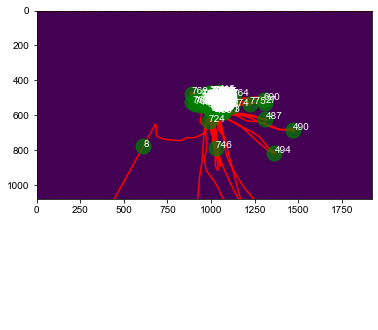

In [98]:
stim.gazePlot(save_fig=True)

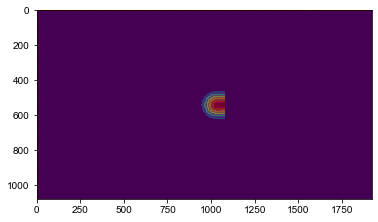

In [99]:
stim.gazeHeatMap(save_fig=True)

In [101]:
%matplotlib qt
stim.visualize(show=True, save_data=True)

C:\Users\parkh\Anaconda3\lib\site-packages\matplotlib\animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
